<a href="https://colab.research.google.com/github/ksks48/Python-labs/blob/main/%D0%A5%D0%BE%D1%80%D1%94%D1%88%D0%BA%D0%BE_%D0%9B%D0%A03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторна робота №3

з дисципліни "Обробка даних Python"

---

Виконала:

студентка групи КН-221Д

Хорєшко Ксенія Олександрівна


---


Прийняв:

асистент кафедри

Звєрцев Г.О.

**Мета:** Вивчення функцій Pandas для злиття, агрегування та візуалізації даних

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
file = '/content/drive/MyDrive/Обробка даних Python/Lab3_Datasetі.zip (Unzipped Files)/En_In.xls'

1. Загрузити файл з даними про споживання енергії “En_In.xls”, який являє собою перелік показників енергозабезпечення та виробництва відновлюваної електроенергії, і ввести їх в DataFrame.

Майте на увазі, що це файл Excel, а не .csv. Також необхідно НЕ ВКЛЮЧАТИ інформацію з нижніх та верхніх рядків файлу даних. Перші два стовпці непотрібні, тому їх необхідно виключити із датафрейму, а також поміняти мітки стовпців так, щоб вони були такими:

['Country', 'Energy Supply', 'Energy Supply per Capita', '%
Renewable]

In [ ]:
df = pd.read_excel(file, skiprows=range(0, 18), skipfooter=38)

df = df.iloc[:, 2:]
df.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

Перші 5 рядків датафрейму.

In [ ]:
df.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Albania,102,35,100.000000
1,Algeria,1959,51,0.551010
2,American Samoa,...,...,0.641026
3,Andorra,9,121,88.695650
4,Angola,642,27,70.909090


Останні 5 рядків датафрейму.

In [ ]:
df.tail()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
221,Viet Nam,2554,28,45.32152
222,Wallis and Futuna Islands,0,26,0.00000
223,Yemen,344,13,0.00000
224,Zambia,400,26,99.71467
225,Zimbabwe,480,32,52.53612


2. Переведіть дані із стовпчику ‘Energy Supply’ в гДж (Примітка: в 1ПДж = 1000000 ГДж). Для всіх країн, у яких відсутні дані (наприклад, дані з "....."), переконайтеся, що це відображається як значення np.NaN.

In [ ]:
df = df.replace("...", np.NaN)
df['Energy Supply'] = df['Energy Supply'] * 1000000

df.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Albania,1.020000e+08,35.0,100.000000
1,Algeria,1.959000e+09,51.0,0.551010
2,American Samoa,NaN,NaN,0.641026
3,Andorra,9.000000e+06,121.0,88.695650
4,Angola,6.420000e+08,27.0,70.909090


3. Перейменуйте наступний список країн:

"Republic of Korea": "South Korea",

"United States of America": "United States",

"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",

"China, Hong Kong Special Administrative Region": "Hong Kong"

In [ ]:
df['Country'] = df['Country'].replace({
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
})
df.loc[df['Country'] == 'United States']

,Country,Energy Supply,Energy Supply per Capita,% Renewable
215,United States,9.083800e+10,286.0,11.57098


4. Існує також декілька країн, що мають в назві цифри та/або дужки. Обов’язково видаліть їх, напр. 'Bolivia (Plurinational State of)' повинна бути ‘Bolivia’, ‘Switzerland17’ повинна бути Switzerland’.

In [ ]:
df['Country'] = df['Country'].str.replace(r" \(.*\)", "", regex=True)
df['Country'] = df['Country'].str.replace(r"\d+", "", regex=True)

Очікуваний вивід для завдань 1-4:

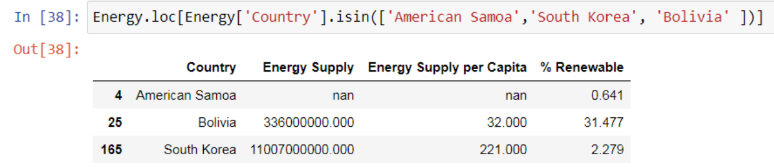

In [ ]:
df.loc[df['Country'].isin(['American Samoa', 'South Korea', 'Bolivia'])]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
2,American Samoa,NaN,NaN,0.641026
23,Bolivia,3.360000e+08,32.0,31.477120
163,South Korea,1.100700e+10,221.0,2.279353


5. Далі, завантажте дані про ВВП з файлу „gpd.csv”, що містить дані Світового банку про ВВП країн від 1960 до 2015 року. Обов’язково не включайте заголовок до датафрейму і перейменуйте наступний список країн:

"Korea, Rep.": "South Korea",

"Iran, Islamic Rep.": "Iran",

"Hong Kong SAR, China": "Hong Kong"

Очікуваний вивід для завдання 5 ( показані тільки 11 стовпчиків):
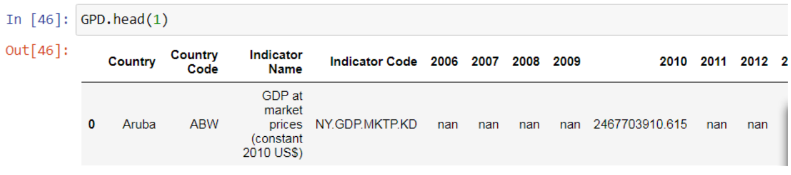

In [ ]:
gdp = pd.read_csv('/content/drive/MyDrive/Махов Обробка даних Python/Lab3_Datasetі.zip (Unzipped Files)/gpd.csv', skiprows=4)

gdp['Country Name'] = gdp['Country Name'].replace({
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
})

gdp.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN


6. Завантажте дані з файлу „scimagojr.xlsx”, який класифікує країни на основі їхніх публікацій в журналах у галузі енергетичного машинобудування та енергетичних технологій.

In [ ]:
scimagojr = pd.read_excel('/content/drive/MyDrive/Обробка даних Python/Lab3_Datasetі.zip (Unzipped Files)/scimagojr.xlsx')
scimagojr.head()

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57


7. Приєднайте три набори даних із завдань 1-6 до нового набору даних використовуючи перетин назв країн).
- Використовуйте лише дані про ВВП за останні 10 років (2006-2015 рр.) і
лише 15 найкращих країн за рейтингом Scimagojr (Rank від 1 до 15)
- Індексом цього DataFrame повинна бути назва країни, а стовпцями мають
бути ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

Ви повинні отримати DataFrame з 15 рядками та 20 стовпцями.

Очікуваний вивід для завдання 7 (показані тільки 9 стовпчиків):
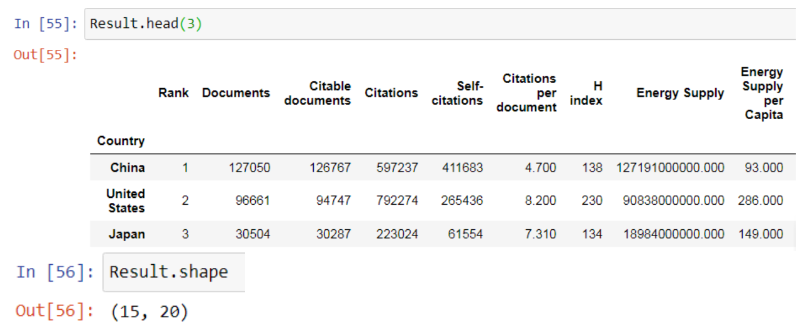

In [ ]:
gdp = gdp[['Country Name', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
scimagojr = scimagojr[scimagojr['Rank'] <= 15]

merged = pd.merge(scimagojr, df, how='inner', left_on='Country', right_on='Country')
merged = pd.merge(merged, gdp, how='inner', left_on='Country', right_on='Country Name')

merged = merged.set_index('Country')
merged = merged.drop(columns=['Country Name'])

merged.head(3)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.75491,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.57098,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.23282,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12


In [ ]:
merged.shape

(15, 20)

**Завдання 8 – 14 слід розв’язувати за допомогою датафрейму із завдання 7.**

8. Створіть функцію, щоб визначити середній ВВП країн за останні 10 років. Ця функція повинна повертати об’єкт Series з 15 країнами та їх середній ВВП, відсортований за спаданням.

Очікуваний вивід для завдання 8

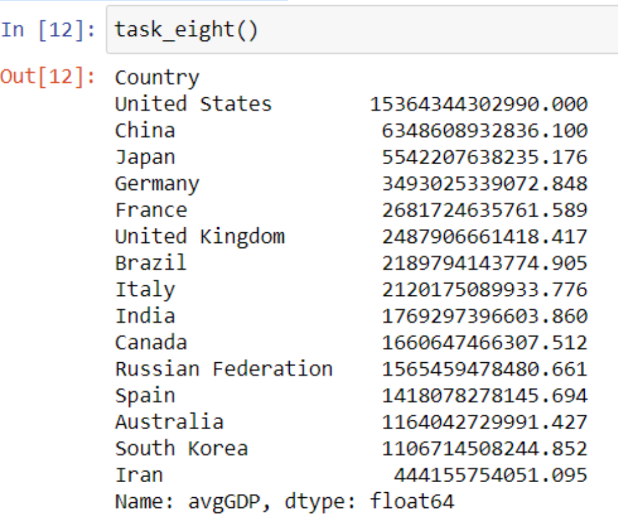

In [ ]:
def task_eight():
    years = [str(year) for year in range(2006, 2016)]
    merged['avgGDP'] = merged[years].mean(axis=1)
    return merged['avgGDP'].sort_values(ascending=False)

avg_gdp = task_eight()
print(avg_gdp)

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: avgGDP, dtype: float64


9. Створіть функцію, щоб визначити, наскільки змінився ВВП за останні 10 років для країни з 5-м середнім ВВП.
Ця функція повинна повертати кортеж із назвою країни та значенням, на яке змінився ВВП.

Очікуваний вивід для завдання 9:

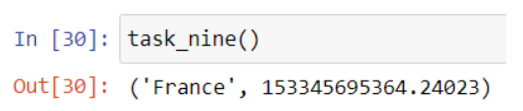

In [ ]:
def task_nine():
    country = avg_gdp.index[4]
    gdp_change = merged.loc[country, '2015'] - merged.loc[country, '2006']
    return (country, gdp_change)

change = task_nine()
print(change)

('France', 153345695364.24023)


10. Створіть функцію, щоб визначити, в якій країні встановлено максимум поновлюваних джерел енергії (% Renewable) та який саме відсоток. Ця функція повинна повертати кортеж із назвою країни та відсотком.

Очікуваний вивід для завдання 10:

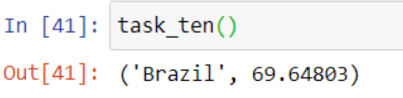

In [ ]:
def task_ten():
    max_renew = merged['% Renewable'].idxmax()
    return (max_renew, merged.loc[max_renew, '% Renewable'])

max_renew = task_ten()
print(max_renew)

('Brazil', 69.64803)


11. Створіть стовпець, в якому оцінюється чисельність населення. Для пошуку оцінки використовуйте значення енергопостачання (Energy Supply) та енергопостачання на душу населення (Energy Supply per capita). Яка країна є шостою за цією оцінкою?

Ця функція повинна повертати кортеж із назвою країни та населенням.

Очікуваний вивід для завдання 11

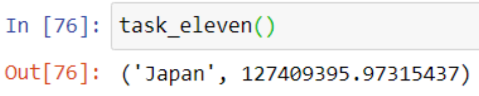

In [ ]:
def task_eleven():
    merged['Population Estimate'] = merged['Energy Supply'] / merged['Energy Supply per Capita']
    country = merged['Population Estimate'].sort_values(ascending=False).index[5]
    return (country, merged.loc[country, 'Population Estimate'])

pop_estimate = task_eleven()
print(pop_estimate)

('Japan', 127409395.97315437)


12. Створіть стовпець, в якому оцінюється кількість цитованих документів на одну особу. Який взаємозв'язок між кількістю цитованих документів на душу населення та енергозабезпеченням на душу населення? Використовуйте метод .corr () (кореляція Пірсона).

Ця функція повинна повертати одне число.

Очікуваний вивід для завдання 12.

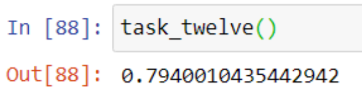

In [ ]:
def task_twelve():
    merged['Cited docs per Person'] = merged['Citable documents'] / merged['Population Estimate']
    correlation = merged['Cited docs per Person'].corr(merged['Energy Supply per Capita'])
    return correlation

correlation = task_twelve()
print(correlation)

0.7940010435442946


13. Створіть новий стовпчик в який занесіть 1, якщо значення % відновлюваної енергії (% Renewable) країни дорівнює або вище медіани для всіх країн, і 0, якщо значення (% Renewable) нижче медіани. Ця функція повинна повертати Series, індексом якого є назва країни, відсортована у порядку зростання Rank.

Очікуваний вивід для завдання 13

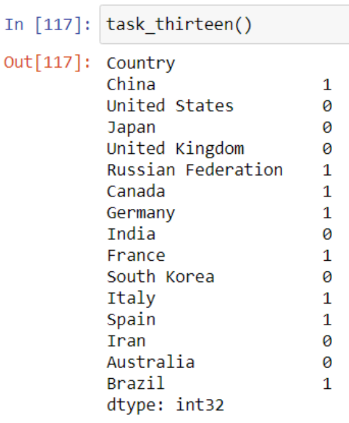

In [ ]:
def task_thirteen():
    median_renewable = merged['% Renewable'].median()
    merged['HighRenew'] = (merged['% Renewable'] >= median_renewable).astype(int)
    return merged['HighRenew']

high_renew = task_thirteen()
print(high_renew)

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: HighRenew, dtype: int64


14. Використайте наступний словник, щоб згрупувати країни за континентами, потім створіть DataFrame, який відображає розмір вибірки (кількість країн на кожному континенті), а також суму, середнє та стандартне відхилення для оцінки кількості населення для кожної країни.

ContinentDict = {'China':'Asia',

'United States':'North America',

'Japan':'Asia',

'United Kingdom':'Europe',

'Russian Federation':'Europe',

'Canada':'North America',

'Germany':'Europe',

'India':'Asia',

'France':'Europe',

'South Korea':'Asia',

'Italy':'Europe',

'Spain':'Europe',

'Iran':'Asia',

'Australia':'Australia',

'Brazil':'South America'}

Ця функція повинна повертати DataFrame з індексом, що має ім’я Continent ['Asia', 'Australia', 'Europe', 'North America', 'South America'] та стовпцями ['size', 'sum', 'mean', 'std '].

Очікуваний вивід для завдання 14

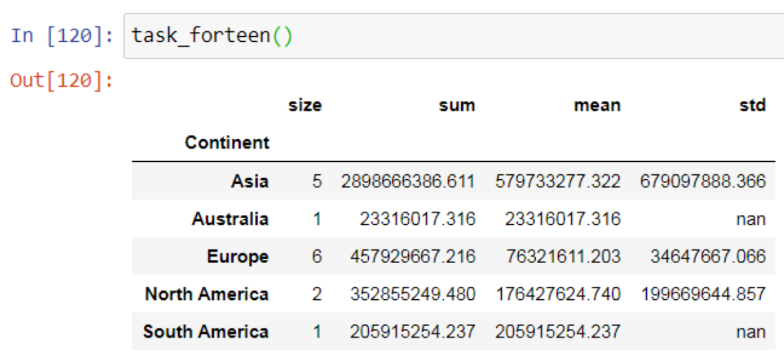

In [ ]:
continent_dict = {
        'China':'Asia',
        'United States':'North America',
        'Japan':'Asia',
        'United Kingdom':'Europe',
        'Russian Federation':'Europe',
        'Canada':'North America',
        'Germany':'Europe',
        'India':'Asia',
        'France':'Europe',
        'South Korea':'Asia',
        'Italy':'Europe',
        'Spain':'Europe',
        'Iran':'Asia',
        'Australia':'Australia',
        'Brazil':'South America'
    }

In [ ]:
def task_fourteen():
    merged['Continent'] = merged.index.to_series().map(continent_dict)
    result = merged.groupby('Continent')['Population Estimate'].agg(['size', 'sum', 'mean', 'std'])
    return result

continent_stats = task_fourteen()
continent_stats

,size,sum,mean,std
Continent,,,,
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1,2.331602e+07,2.331602e+07,NaN
Europe,6,4.579297e+08,7.632161e+07,3.464767e+07
North America,2,3.528552e+08,1.764276e+08,1.996696e+08
South America,1,2.059153e+08,2.059153e+08,NaN


15. Створіть бульбашкову діаграму, що відображає залежність % поновлюваних джерел від рейтингу країни (% Renewable vs. Rank). Розмір бульбашки від повідає ВВП країн 2015 року, а колір відповідає континенту.

Очікуваний вивід для завдання 15:

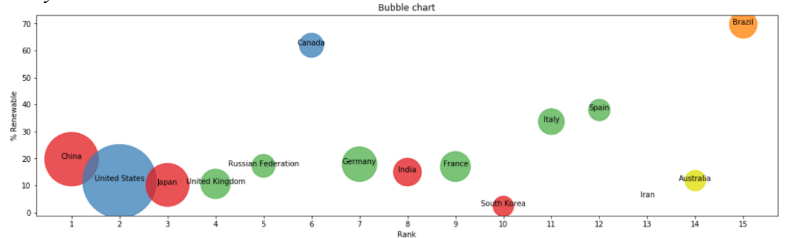

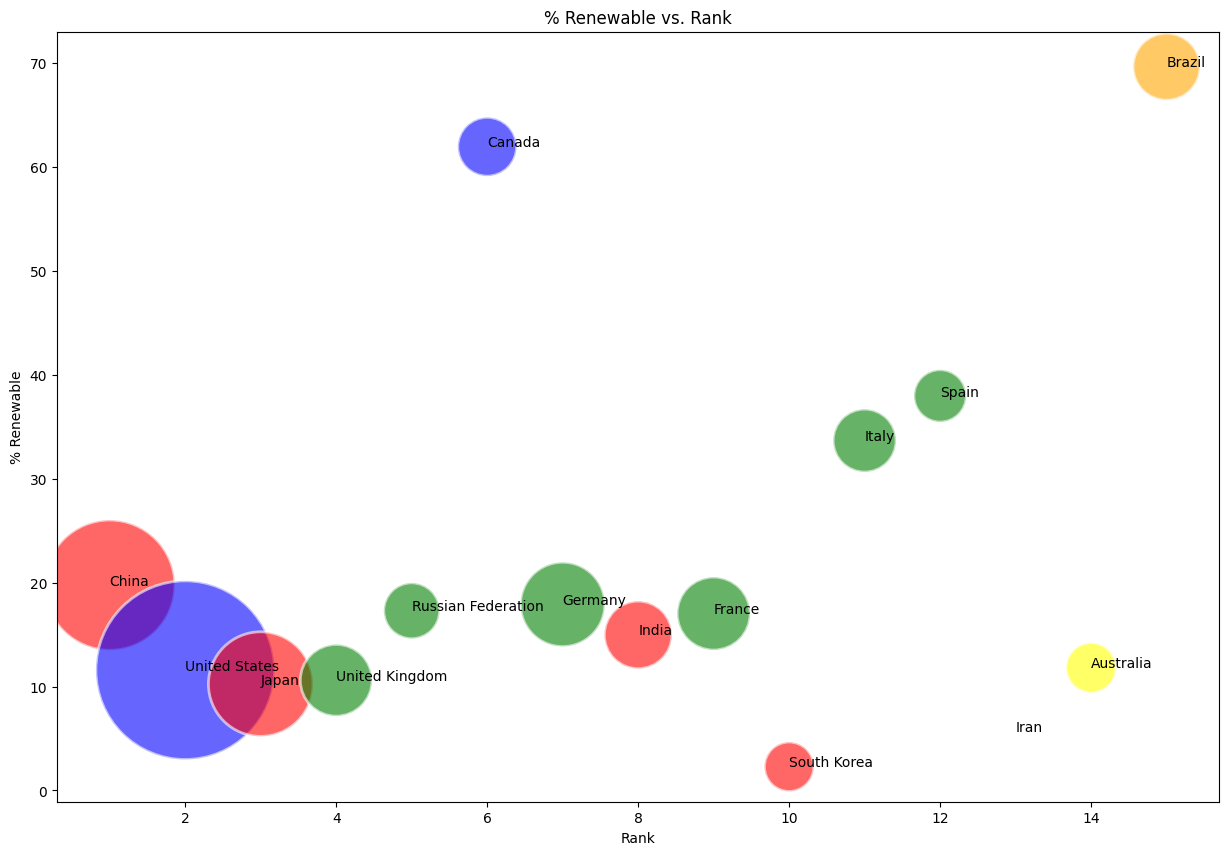

In [ ]:
colors = {
    'Asia':'red',
    'Australia':'yellow',
    'Europe':'green',
    'North America':'blue',
    'South America':'orange'
}

df = merged.copy()
df['Color'] = df.index.to_series().map(continent_dict).map(colors)

fig, ax = plt.subplots()
ax.scatter(df['Rank'], df['% Renewable'], s=df['2015']/10**9, c=df['Color'], alpha=0.6, edgecolors="w", linewidth=2)

fig.set_figheight(10)
fig.set_figwidth(15)

plt.title('% Renewable vs. Rank')
plt.xlabel('Rank')
plt.ylabel('% Renewable')

for i, txt in enumerate(df.index):
    ax.annotate(txt, (df['Rank'].iat[i], df['% Renewable'].iat[i]))

[Посилання на GitHub](https://github.com/ksks48/Python_Data_Processing/commit/475deeac130408283feb13b2c36f60fd0e2ecab2)

**Висновок:**

В ході цієї лабораторної роботи ми успішно вивчили функції Pandas для злиття, агрегування та візуалізації даних.